## Observations and Insights

## Dependencies and starter code

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grp = "Drug Regimen"
aggColumn = 'Tumor Volume (mm3)'
newdf = merged.groupby(grp).agg({aggColumn: [np.mean, np.median, np.var, np.std, st.sem]}).round(2)
newdf.head()

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60

## Bar plots

Text(0, 0.5, 'Number of Data Points')

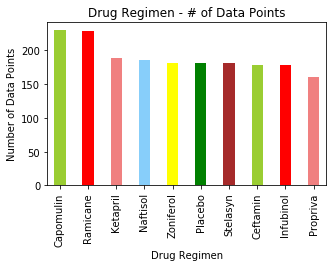

In [28]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Collect the data points 
x = merged.groupby(grp)["Mouse ID"].count()

# convert from series to dataframe
df = pd.DataFrame(x).reset_index()
df.columns = ['Drug Regimen', 'Data Points']
df = df.sort_values('Data Points', ascending = False)

# Assign colors
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "yellow", "green", "brown"]

# Dataframe plot
df.plot(kind='bar',
        x='Drug Regimen',
        y='Data Points', 
        color=colors, 
        legend = False, 
        title="Drug Regimen - # of Data Points",
        figsize= (5,3),
        width=0.4
       )

# Give the chart an x label, and y label
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

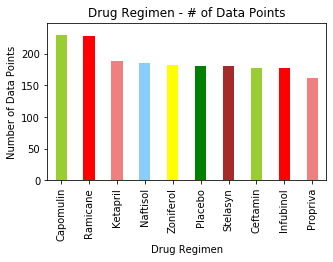

In [29]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Reuse same dataframe + colors from previous

x_axis = df[grp]
tick_locations = [value for value in x_axis]

# Set figure size to adjust for space
plt.figure(figsize=(5,3))

# Tighten up!
plt.xlim(-0.50, len(x_axis)-0.5) # horizontal "fit"
plt.ylim(0, max(df["Data Points"]) + 19) # vertical "fit"

plt.bar(x_axis, 
        df["Data Points"], 
        color=colors, 
        alpha=1, 
        align="center",
        width=0.4
       )

# Twist the labels 
plt.xticks(tick_locations, df[grp], rotation="vertical")

# Give the chart an x label, and y label
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Drug Regimen - # of Data Points")
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)

# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

## Pie plots

[Text(0, 0.5, '')]

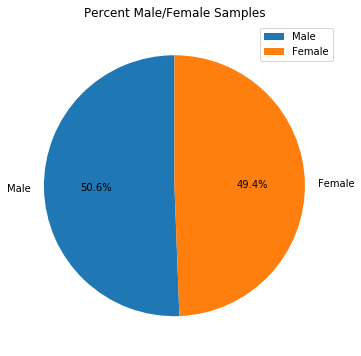

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grp2 = "Sex"

# Collect the data points 
x = merged.groupby(grp2)["Mouse ID"].count()

# convert from series to dataframe
df = pd.DataFrame(x).reset_index()
df.columns = ['Sex', 'Mice']
df = df.sort_values('Mice', ascending = False)
df.index = df[grp2]

plot = df.plot(kind='pie'
        , y='Mice'
        , figsize=(6, 6)
        , autopct='%1.1f%%'
        , startangle=90
        , legend = True
        , title="Percent Male/Female Samples"
       )
plot.set(ylabel="")

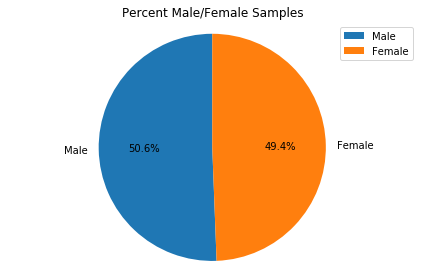

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Colors
# colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    df['Mice'],
    # with the labels being officer names
    labels=df[grp2],
    # with no shadows
    shadow=False,
    # with colors
    # colors=colors,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set the title and legend
plt.legend(df[grp2])
plt.title("Percent Male/Female Samples")

# View the plot
plt.tight_layout()
plt.show()

## Quartiles, outliers and boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

# Readme: Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#    Capomulin, Ramicane, Infubinol, and Ceftamin. 

# Get the last row per mouse for each regimen. 
# Filter for the required regimens

# Sort by Regimen and Mouse, then by timepoint. 
subset = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mostpromising = merged[merged[grp].isin(subset)].sort_values(
        [grp, "Mouse ID", "Timepoint"]
    , ascending=[True, True, True]
)

# Get the last row per group
# grp = "Drug Regimen"
# aggColumn = tumor column
print("Final tumor volume for each mouse / regimen:")
finalTV_by_DR_Mouse = mostpromising.groupby([grp, "Mouse ID"]).tail(1)[["Mouse ID", grp, aggColumn]].round(2)
finalTV_by_DR_Mouse 

Final tumor volume for each mouse / regimen:


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
309,b128,Capomulin,38.98
299,b742,Capomulin,38.94
64,f966,Capomulin,30.49
244,g288,Capomulin,37.07
360,g316,Capomulin,40.16
440,i557,Capomulin,47.69
204,i738,Capomulin,37.31
337,j119,Capomulin,38.13
317,j246,Capomulin,38.75
380,l509,Capomulin,41.48


In [67]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers 
# across all four treatment regimens.

quartiles = finalTV_by_DR_Mouse[aggColumn].quantile([.25,.5,.75])
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = round(upperq-lowerq, 2)

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Store in new dataframe to make it easier later:
outlier_below = finalTV_by_DR_Mouse[(finalTV_by_DR_Mouse[aggColumn] < lower_bound)]
outlier_above = finalTV_by_DR_Mouse[(finalTV_by_DR_Mouse[aggColumn] > upper_bound)]

print("")
print("------------------------")
print("Outliers - below lower bound:")
print("------------------------")
print(outlier_below.head())

print("")
print("------------------------")
print("Outliers - above upper bound:")
print("------------------------")
print(outlier_above.head())

print("")
print("------------------------")
print("The lowest tumor growth:")
print("------------------------")
print(finalTV_by_DR_Mouse.sort_values(aggColumn).head())

print("")
print("------------------------")
print("The largest tumor growth:")
print("------------------------")
print(finalTV_by_DR_Mouse.sort_values(aggColumn, ascending = False).head())

The lower quartile of tumor volume is: 37.19
The upper quartile of tumor volume is: 59.93
The interquartile range of tumor volume is: 22.74
The the median of tumor volume is: 45.0 
Values below 3.08 could be outliers.
Values above 94.04 could be outliers.

------------------------
Outliers - below lower bound:
------------------------
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Tumor Volume (mm3)]
Index: []

------------------------
Outliers - above upper bound:
------------------------
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Tumor Volume (mm3)]
Index: []

------------------------
The lowest tumor growth:
------------------------
   Mouse ID Drug Regimen  Tumor Volume (mm3)
9      k403     Ramicane               22.05
19     s185    Capomulin               23.34
39     m601    Capomulin               28.43
29     x401    Capomulin               28.48
49     g791     Ramicane               29.13

------------------------
The largest tumor growth:
------------------------

In [76]:
# quantitatively determine if there are any potential outliers 
# across all four treatment regimens.

print("")
print("------------------------")
print("How many outliers total?")
print("------------------------")
outliers_tot_below = len(outlier_below)
outliers_tot_above = len(outlier_above)

if outliers_tot_below == 0:
    print(f"There are no rows with values below the lower bound ({lower_bound})")
else:
    print(f'There are {outliers_tot_below} rows with values below the lower bound ({lower_bound})')
    
if outliers_tot_above == 0:
    print(f"There are no rows with values above the upper bound ({upper_bound})")
else:
    print(f'There are {outliers_tot_above} rows with values above the upper bound ({upper_bound})')


------------------------
How many outliers total?
------------------------
There are no rows with values below the lower bound (3.08)
There are no rows with values above the upper bound (94.04)


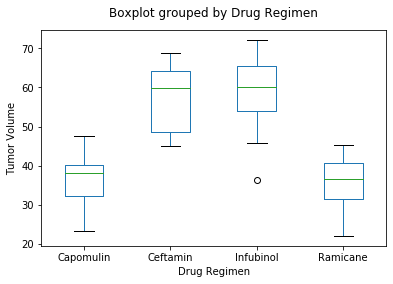

In [77]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
ax1 = finalTV_by_DR_Mouse.boxplot(
    by =grp
    , column =[aggColumn]
    , grid = False
    , showfliers = True
)

ax1.set_title('')
ax1.set_ylabel('Tumor Volume')
plt.show()

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen